# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

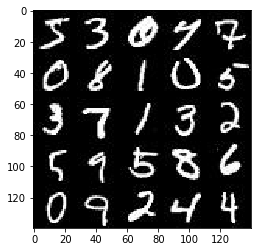

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

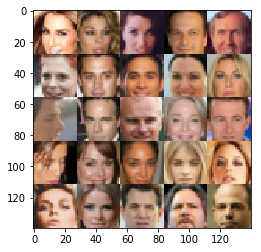

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


C:\Users\zb8\AppData\Local\Continuum\Miniconda3\envs\dlnd-tf-lab\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.1
        
        #Layer 1
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        #Layer 2
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        #Layer 3
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=5, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        #Layer 4
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        alpha = 0.1
        
        #layer 1
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        #Layer 2
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        #Layer 3
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        #Layer 4
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    fake = generator(input_z, out_channel_dim, is_train=True)
    
    model_real, logits_real = discriminator(input_real, reuse=False)
    model_fake, logits_fake = discriminator(fake, reuse=True)
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                                    logits=logits_real, labels=tf.ones_like(logits_real) * (1 - smooth) ))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                                    logits=logits_fake, labels=tf.zeros_like(logits_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                              logits=logits_fake, labels=tf.ones_like(logits_fake)))
    
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        d_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
      
    # For displaying
    n_images = 25
    print_every = 10
    show_every = 100
    
    # Get the image dim
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, len(data_image_mode))
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    #Initialize
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Scaling from -0.5 to +0.5 => -1 to +1
                batch_images = batch_images * 2
                
                #Noise for the generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #Run
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate}) 
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr: learning_rate})
                
                #Displaying losses
                if steps % print_every == 0: 
                    # At the end of each epoch, get the losses and print them out 
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images * 2}) 
                    train_loss_g = g_loss.eval({input_z: batch_z}) 
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count), 
                          "Discriminator Loss: {:.4f}...".format(train_loss_d), 
                          "Generator Loss: {:.4f}".format(train_loss_g))                     
                
                #Showing off the generated images
                if steps % show_every == 0:                    
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3599... Generator Loss: 4.8931
Epoch 1/2... Discriminator Loss: 0.9147... Generator Loss: 6.4437
Epoch 1/2... Discriminator Loss: 0.5704... Generator Loss: 1.8716
Epoch 1/2... Discriminator Loss: 1.6348... Generator Loss: 0.6262
Epoch 1/2... Discriminator Loss: 1.7782... Generator Loss: 0.3765
Epoch 1/2... Discriminator Loss: 1.7528... Generator Loss: 0.3774
Epoch 1/2... Discriminator Loss: 1.8235... Generator Loss: 0.7667
Epoch 1/2... Discriminator Loss: 1.6256... Generator Loss: 0.7801
Epoch 1/2... Discriminator Loss: 1.7747... Generator Loss: 0.8383
Epoch 1/2... Discriminator Loss: 1.6470... Generator Loss: 0.6735


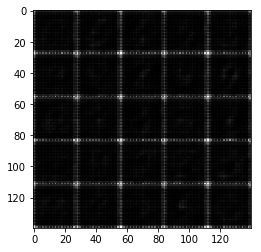

Epoch 1/2... Discriminator Loss: 1.6909... Generator Loss: 0.4570
Epoch 1/2... Discriminator Loss: 1.7181... Generator Loss: 0.4100
Epoch 1/2... Discriminator Loss: 1.5665... Generator Loss: 0.5681
Epoch 1/2... Discriminator Loss: 1.4833... Generator Loss: 0.6360
Epoch 1/2... Discriminator Loss: 1.3887... Generator Loss: 0.6736
Epoch 1/2... Discriminator Loss: 1.3557... Generator Loss: 1.2086
Epoch 1/2... Discriminator Loss: 1.3759... Generator Loss: 0.6189
Epoch 1/2... Discriminator Loss: 2.0621... Generator Loss: 2.4176
Epoch 1/2... Discriminator Loss: 1.3755... Generator Loss: 0.4716
Epoch 1/2... Discriminator Loss: 1.4851... Generator Loss: 0.4243


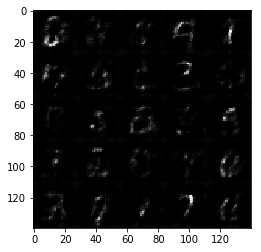

Epoch 1/2... Discriminator Loss: 1.7797... Generator Loss: 0.2861
Epoch 1/2... Discriminator Loss: 1.4058... Generator Loss: 0.4543
Epoch 1/2... Discriminator Loss: 1.6182... Generator Loss: 0.3528
Epoch 1/2... Discriminator Loss: 1.4733... Generator Loss: 0.4090
Epoch 1/2... Discriminator Loss: 0.9470... Generator Loss: 0.9481
Epoch 1/2... Discriminator Loss: 1.0663... Generator Loss: 1.0003
Epoch 1/2... Discriminator Loss: 1.7589... Generator Loss: 0.3076
Epoch 1/2... Discriminator Loss: 1.2496... Generator Loss: 0.6266
Epoch 1/2... Discriminator Loss: 1.4394... Generator Loss: 2.3521
Epoch 1/2... Discriminator Loss: 0.9755... Generator Loss: 1.7715


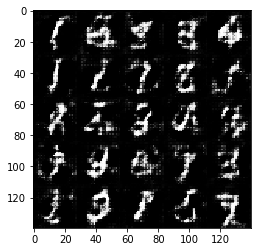

Epoch 1/2... Discriminator Loss: 1.0211... Generator Loss: 0.8918
Epoch 1/2... Discriminator Loss: 1.0657... Generator Loss: 1.1099
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 1.5219
Epoch 1/2... Discriminator Loss: 1.2554... Generator Loss: 1.3029
Epoch 1/2... Discriminator Loss: 1.1469... Generator Loss: 1.5160
Epoch 1/2... Discriminator Loss: 1.2211... Generator Loss: 1.5873
Epoch 1/2... Discriminator Loss: 1.5449... Generator Loss: 0.3895
Epoch 1/2... Discriminator Loss: 1.3995... Generator Loss: 0.4906
Epoch 1/2... Discriminator Loss: 1.7339... Generator Loss: 0.2968
Epoch 1/2... Discriminator Loss: 1.2235... Generator Loss: 0.7843


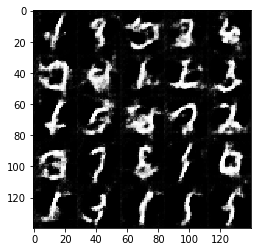

Epoch 1/2... Discriminator Loss: 1.1761... Generator Loss: 1.0681
Epoch 1/2... Discriminator Loss: 1.6428... Generator Loss: 0.3491
Epoch 1/2... Discriminator Loss: 1.7534... Generator Loss: 0.3014
Epoch 1/2... Discriminator Loss: 1.2221... Generator Loss: 0.6332
Epoch 1/2... Discriminator Loss: 1.3344... Generator Loss: 1.1454
Epoch 1/2... Discriminator Loss: 1.3080... Generator Loss: 1.1611
Epoch 2/2... Discriminator Loss: 1.2212... Generator Loss: 1.0090
Epoch 2/2... Discriminator Loss: 1.2383... Generator Loss: 0.7322
Epoch 2/2... Discriminator Loss: 1.2007... Generator Loss: 0.9312
Epoch 2/2... Discriminator Loss: 1.3851... Generator Loss: 0.5114


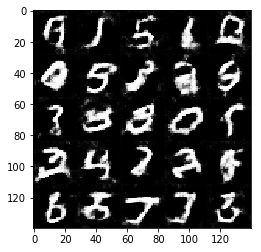

Epoch 2/2... Discriminator Loss: 2.2814... Generator Loss: 0.1836
Epoch 2/2... Discriminator Loss: 1.4920... Generator Loss: 0.4645
Epoch 2/2... Discriminator Loss: 1.5865... Generator Loss: 0.3676
Epoch 2/2... Discriminator Loss: 1.5755... Generator Loss: 0.3854
Epoch 2/2... Discriminator Loss: 1.7461... Generator Loss: 0.3015
Epoch 2/2... Discriminator Loss: 1.0644... Generator Loss: 0.9614
Epoch 2/2... Discriminator Loss: 1.2389... Generator Loss: 0.7813
Epoch 2/2... Discriminator Loss: 1.2216... Generator Loss: 1.1244
Epoch 2/2... Discriminator Loss: 1.6740... Generator Loss: 0.3316
Epoch 2/2... Discriminator Loss: 1.3695... Generator Loss: 0.5004


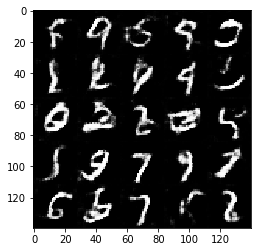

Epoch 2/2... Discriminator Loss: 1.4995... Generator Loss: 0.4156
Epoch 2/2... Discriminator Loss: 1.6722... Generator Loss: 0.3409
Epoch 2/2... Discriminator Loss: 1.5008... Generator Loss: 0.4092
Epoch 2/2... Discriminator Loss: 1.4588... Generator Loss: 0.4313
Epoch 2/2... Discriminator Loss: 1.4800... Generator Loss: 0.4187
Epoch 2/2... Discriminator Loss: 1.5957... Generator Loss: 0.3836
Epoch 2/2... Discriminator Loss: 1.4446... Generator Loss: 0.4695
Epoch 2/2... Discriminator Loss: 1.9069... Generator Loss: 0.2409
Epoch 2/2... Discriminator Loss: 1.1248... Generator Loss: 0.8353
Epoch 2/2... Discriminator Loss: 1.6794... Generator Loss: 0.3192


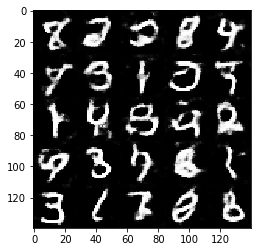

Epoch 2/2... Discriminator Loss: 1.3499... Generator Loss: 0.5114
Epoch 2/2... Discriminator Loss: 1.3282... Generator Loss: 1.6558
Epoch 2/2... Discriminator Loss: 1.1614... Generator Loss: 0.9638
Epoch 2/2... Discriminator Loss: 1.0712... Generator Loss: 0.9904
Epoch 2/2... Discriminator Loss: 1.9163... Generator Loss: 0.2491
Epoch 2/2... Discriminator Loss: 1.5272... Generator Loss: 0.3929
Epoch 2/2... Discriminator Loss: 1.9253... Generator Loss: 0.2436
Epoch 2/2... Discriminator Loss: 1.3443... Generator Loss: 0.5792
Epoch 2/2... Discriminator Loss: 1.4068... Generator Loss: 0.4692
Epoch 2/2... Discriminator Loss: 1.5283... Generator Loss: 0.3854


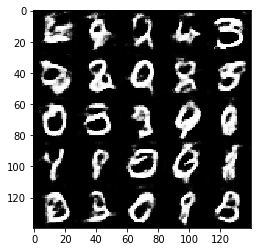

Epoch 2/2... Discriminator Loss: 1.8703... Generator Loss: 0.2623
Epoch 2/2... Discriminator Loss: 1.2348... Generator Loss: 0.5999
Epoch 2/2... Discriminator Loss: 1.3290... Generator Loss: 0.5436
Epoch 2/2... Discriminator Loss: 1.1194... Generator Loss: 1.3141
Epoch 2/2... Discriminator Loss: 1.3002... Generator Loss: 0.5892
Epoch 2/2... Discriminator Loss: 1.7109... Generator Loss: 0.3061
Epoch 2/2... Discriminator Loss: 1.5433... Generator Loss: 0.3849
Epoch 2/2... Discriminator Loss: 1.1260... Generator Loss: 0.7946
Epoch 2/2... Discriminator Loss: 1.2770... Generator Loss: 1.6034
Epoch 2/2... Discriminator Loss: 1.1655... Generator Loss: 0.7687


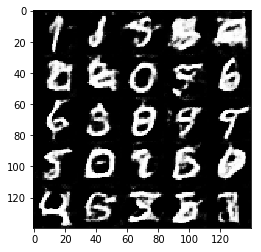

Epoch 2/2... Discriminator Loss: 1.3720... Generator Loss: 0.5452
Epoch 2/2... Discriminator Loss: 1.1212... Generator Loss: 1.4904
Epoch 2/2... Discriminator Loss: 1.3809... Generator Loss: 0.5407


In [12]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6502... Generator Loss: 0.4505
Epoch 1/1... Discriminator Loss: 1.9004... Generator Loss: 0.3309
Epoch 1/1... Discriminator Loss: 3.2936... Generator Loss: 0.0699
Epoch 1/1... Discriminator Loss: 2.6002... Generator Loss: 0.1296
Epoch 1/1... Discriminator Loss: 2.7820... Generator Loss: 0.1108
Epoch 1/1... Discriminator Loss: 1.4717... Generator Loss: 0.4873
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 2.7901... Generator Loss: 4.9212
Epoch 1/1... Discriminator Loss: 0.7473... Generator Loss: 3.0978


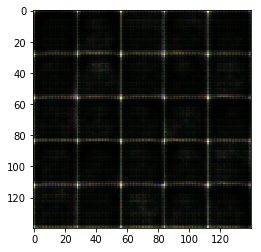

Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 2.2610
Epoch 1/1... Discriminator Loss: 1.6153... Generator Loss: 3.0246
Epoch 1/1... Discriminator Loss: 0.6656... Generator Loss: 2.8022
Epoch 1/1... Discriminator Loss: 0.7497... Generator Loss: 1.3494
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.9020
Epoch 1/1... Discriminator Loss: 1.6184... Generator Loss: 0.3730
Epoch 1/1... Discriminator Loss: 1.8230... Generator Loss: 0.3149
Epoch 1/1... Discriminator Loss: 1.8611... Generator Loss: 0.2775
Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 2.2406
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 3.2863


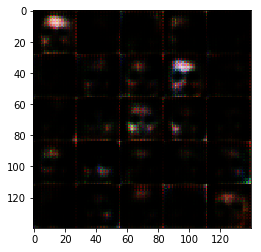

Epoch 1/1... Discriminator Loss: 1.5102... Generator Loss: 1.4654
Epoch 1/1... Discriminator Loss: 0.7791... Generator Loss: 1.7143
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 2.4358
Epoch 1/1... Discriminator Loss: 2.0558... Generator Loss: 0.2229
Epoch 1/1... Discriminator Loss: 2.3737... Generator Loss: 0.1539
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 0.9991... Generator Loss: 0.9695
Epoch 1/1... Discriminator Loss: 1.8729... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 2.1001... Generator Loss: 1.6596
Epoch 1/1... Discriminator Loss: 1.7081... Generator Loss: 1.4896


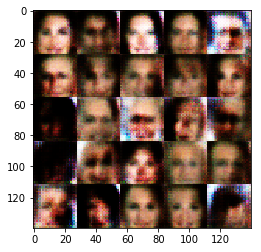

Epoch 1/1... Discriminator Loss: 1.9705... Generator Loss: 2.2142
Epoch 1/1... Discriminator Loss: 1.5324... Generator Loss: 2.2613
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 1.3833
Epoch 1/1... Discriminator Loss: 1.8317... Generator Loss: 0.3435
Epoch 1/1... Discriminator Loss: 1.7670... Generator Loss: 0.3310
Epoch 1/1... Discriminator Loss: 1.1010... Generator Loss: 1.0320
Epoch 1/1... Discriminator Loss: 2.8147... Generator Loss: 0.1141
Epoch 1/1... Discriminator Loss: 1.7080... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.8323... Generator Loss: 0.3192
Epoch 1/1... Discriminator Loss: 1.4596... Generator Loss: 0.5318


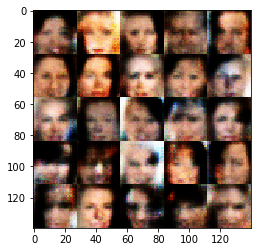

Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 1.1024
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 2.1230... Generator Loss: 0.2351
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.5201
Epoch 1/1... Discriminator Loss: 2.5152... Generator Loss: 0.1353
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 2.8651
Epoch 1/1... Discriminator Loss: 2.2814... Generator Loss: 3.0718
Epoch 1/1... Discriminator Loss: 1.5358... Generator Loss: 2.7995
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 1.5492
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 1.2421


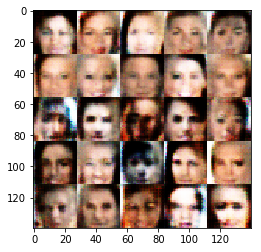

Epoch 1/1... Discriminator Loss: 2.0085... Generator Loss: 0.3075
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 2.4663
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 1.1804
Epoch 1/1... Discriminator Loss: 1.6156... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.1911... Generator Loss: 1.5877
Epoch 1/1... Discriminator Loss: 2.4111... Generator Loss: 0.1500
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.6101
Epoch 1/1... Discriminator Loss: 2.0317... Generator Loss: 0.2652
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 1.0019
Epoch 1/1... Discriminator Loss: 1.7885... Generator Loss: 0.3244


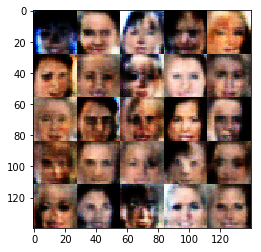

Epoch 1/1... Discriminator Loss: 1.6598... Generator Loss: 0.5478
Epoch 1/1... Discriminator Loss: 1.5867... Generator Loss: 0.7392
Epoch 1/1... Discriminator Loss: 2.5729... Generator Loss: 0.1323
Epoch 1/1... Discriminator Loss: 1.8258... Generator Loss: 0.4094
Epoch 1/1... Discriminator Loss: 1.1498... Generator Loss: 1.1319
Epoch 1/1... Discriminator Loss: 3.7793... Generator Loss: 1.3619
Epoch 1/1... Discriminator Loss: 2.2041... Generator Loss: 3.4511
Epoch 1/1... Discriminator Loss: 1.8048... Generator Loss: 0.4619
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 2.4079... Generator Loss: 3.2151


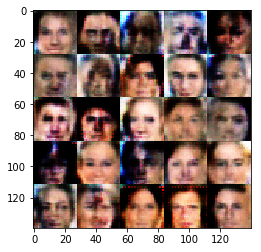

Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 2.1776... Generator Loss: 0.3043
Epoch 1/1... Discriminator Loss: 2.1318... Generator Loss: 3.3983
Epoch 1/1... Discriminator Loss: 2.4375... Generator Loss: 2.2439
Epoch 1/1... Discriminator Loss: 2.2152... Generator Loss: 0.8750
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.8367
Epoch 1/1... Discriminator Loss: 2.0565... Generator Loss: 0.4122
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.4700... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.0933... Generator Loss: 1.0755


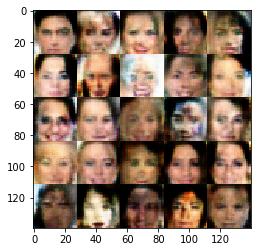

Epoch 1/1... Discriminator Loss: 1.9175... Generator Loss: 0.5497
Epoch 1/1... Discriminator Loss: 1.8263... Generator Loss: 0.7678
Epoch 1/1... Discriminator Loss: 2.2283... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.7206... Generator Loss: 0.4583
Epoch 1/1... Discriminator Loss: 2.3585... Generator Loss: 0.2755
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 1.5096
Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 1.3147
Epoch 1/1... Discriminator Loss: 2.4226... Generator Loss: 1.3708
Epoch 1/1... Discriminator Loss: 1.7461... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.8170... Generator Loss: 1.1422


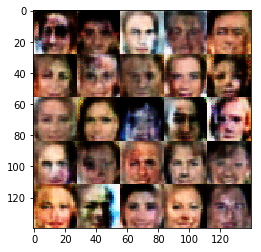

Epoch 1/1... Discriminator Loss: 2.5125... Generator Loss: 1.6822
Epoch 1/1... Discriminator Loss: 1.7479... Generator Loss: 1.2778
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 1.3713
Epoch 1/1... Discriminator Loss: 1.6567... Generator Loss: 1.0803
Epoch 1/1... Discriminator Loss: 2.3213... Generator Loss: 0.4697
Epoch 1/1... Discriminator Loss: 1.9129... Generator Loss: 0.4152
Epoch 1/1... Discriminator Loss: 2.2883... Generator Loss: 1.9358
Epoch 1/1... Discriminator Loss: 3.2803... Generator Loss: 2.5346
Epoch 1/1... Discriminator Loss: 2.2934... Generator Loss: 0.3134
Epoch 1/1... Discriminator Loss: 1.6380... Generator Loss: 0.7395


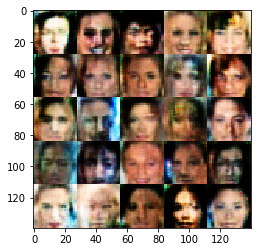

Epoch 1/1... Discriminator Loss: 1.8685... Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 2.6085... Generator Loss: 0.1622


KeyboardInterrupt: 

In [13]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.